### 6 Switching to Pyro

#### (a) Use pyro to reimplement the Bayesian network with parameter values you fitted in question 3. Use default iss values and round parameter estimates to 2 decimal places. Show source code.

In [75]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import pyro
import pyro.distributions as dist

pyro.set_rng_seed(101)

In [76]:
def bn():
    age = pyro.sample("A", dist.Categorical(torch.tensor([0.36, 0.16,0.48])))
    sex = pyro.sample("S", dist.Categorical(torch.tensor([0.55, 0.45])))
    edu_probs = torch.tensor([[[0.64,0.36],[0.84,0.16],[0.16,0.84]],[[0.72,0.28],[0.89,0.11],[0.81,0.19]]])
    education = pyro.sample("E", dist.Categorical(edu_probs[sex][age]))
    occ_probs = torch.tensor([[0.98,0.02],[0.97,0.03]])
    occupation = pyro.sample("O", dist.Categorical(occ_probs[education]))
    res_probs = torch.tensor([[0.72,0.28],[0.94,0.06]])
    residence = pyro.sample("R", dist.Categorical(res_probs[education]))
    trav_probs = torch.tensor([[[0.71,0.14,0.15],[0.69,0.16,0.15]],[[0.55,0.08,0.37],[0.73,0.25,0.02]]])
    travel = pyro.sample("T", dist.Categorical(trav_probs[residence][occupation]))

#### (b) You observe a person with a university degree. What is your prediction of this person’s means of travel? Provide either a MAP estimate or a histogram of the marginal on the variable “T”.

In [77]:
conditioned_bn1 = pyro.condition(bn, data={'E':torch.tensor(1)})

In [78]:
posterior = pyro.infer.Importance(conditioned_bn1, num_samples=1000).run()
marginal = pyro.infer.EmpiricalMarginal(posterior, "T") 
travel_samples = np.array([marginal().item() for _ in range(1000)])
t_unique, t_counts = np.unique(travel_samples,return_counts=True)

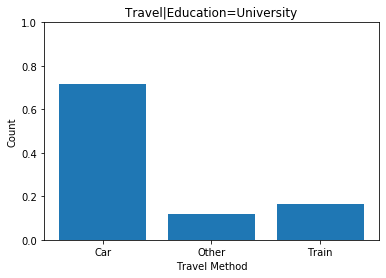

In [79]:
plt.xlabel("Travel Method")
plt.ylabel("Count")
plt.bar(t_unique, [t/1000 for t in t_counts]) 
plt.yticks([0.0,0.2,0.4,0.6, 0.8,1.0])
plt.xticks(ticks=t_unique,labels=["Car", "Other", "Train"])
plt.title("Travel|Education=University")
plt.show()

#### (c) You observe a self-employed person who lives in a big city. What is your prediction of this person’s age? Provide either a MAP estimate or a histogram of the marginal on the variable “A”.

In [80]:
conditioned_bn2 = pyro.condition(bn, data={'O':torch.tensor(1),'R':torch.tensor(0)})

In [81]:
posterior2 = pyro.infer.Importance(conditioned_bn2, num_samples=1000).run()
marginal2 = pyro.infer.EmpiricalMarginal(posterior2, "A") 
age_samples = np.array([marginal2().item() for _ in range(1000)])
a_unique, a_counts = np.unique(age_samples,return_counts=True)

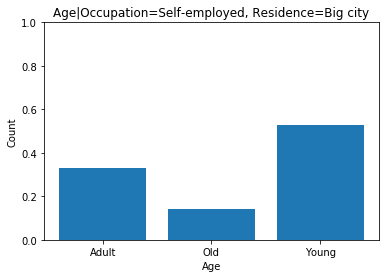

In [82]:
plt.xlabel("Age")
plt.ylabel("Count")
plt.bar(a_unique, [a*.001 for a in a_counts]) 
plt.xticks(ticks=a_unique,labels=["Adult", "Old", "Young"])
plt.yticks([0.0,0.2,0.4,0.6, 0.8,1.0])
plt.title("Age|Occupation=Self-employed, Residence=Big city");